## 小技集

# pip3　を含むライブラリのパス

# pip3 show <インストールモジュール名>

# Warning　消す　コード

# [[]]にすることでDataFrameまま参照できる

# 分散とバイアス

# arrayの適当な作り方

In [2]:
import numpy as np
a = np.arange(10).reshape(2,5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

# 1次元の変換方法

In [3]:
a = a.flatten()
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# DataFrameの適当な作り方　とDataFrame.dtypesの使い方

In [4]:
import pandas as pd
for_index = [1,2,3,4,5,6]
df = pd.DataFrame(np.random.randn(6,4),index = for_index, columns = list("ABCD"))
df

,A,B,C,D
1,-0.377091,0.490514,0.874188,-1.109932
2,-0.144340,-0.331178,0.214746,-0.404652
3,-0.351672,-0.369310,-1.029390,-1.493540
4,0.948152,-0.152733,-0.301821,-1.323878
5,1.965741,-0.111038,-1.331724,0.892495
6,0.892556,-0.048724,0.303046,1.909380


In [25]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : ['foo', 'hoge', 'kei', 'foo']
                   })

In [26]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,hoge
2,1.0,2013-01-02,1.0,3,test,kei
3,1.0,2013-01-02,1.0,3,train,foo


In [27]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# DataFrameの groupbyとagg関数の使い方

In [28]:
group = df2.groupby(['E', 'F'])
group.sum() ## mean(), min(), max(), std(), var()

A    C    D
E     F                  
test  foo   1.0  1.0  3.0
      hoge  NaN  NaN  NaN
      kei   1.0  1.0  3.0
train foo   1.0  1.0  3.0
      hoge  1.0  1.0  3.0
      kei   NaN  NaN  NaN

In [29]:
group.sum().reset_index()

,E,F,A,C,D
0,test,foo,1.0,1.0,3.0
1,test,hoge,NaN,NaN,NaN
2,test,kei,1.0,1.0,3.0
3,train,foo,1.0,1.0,3.0
4,train,hoge,1.0,1.0,3.0
5,train,kei,NaN,NaN,NaN


In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
iris_df = sns.load_dataset("iris")

In [70]:
print(iris_df.shape)
iris_df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [77]:
a = iris_df.groupby(['species','petal_width']).sum()
a

sepal_length  sepal_width  petal_length
species    petal_width                                         
setosa     0.1                  24.1         16.8           6.9
           0.2                 144.2         98.0          41.9
           0.3                  34.8         23.3          10.0
           0.4                  37.1         26.5          11.0
           0.5                   5.1          3.3           1.7
           0.6                   5.0          3.5           1.6
versicolor 1.0                  37.9         16.6          25.4
           1.1                  16.2          7.4          10.7
           1.2                  28.9         13.7          21.2
           1.3                  76.5         35.7          54.3
           1.4                  44.5         20.7          31.5
           1.5                  61.9         28.8          45.8
           1.6                  18.3          9.4          14.3
           1.7                   6.7          3.0           5.0
           1.8                   5.9          3.2           4.8
virginica  1.4                   6.1          2.6           5.6
           1.5                  12.3          5.0          10.1
           1.6                   7.2          3.0           5.8
           1.7                   4.9          2.5           4.5
           1.8                  70.9         32.1          59.2
           1.9                  31.7         13.4          26.6
           2.0                  39.9         18.1          33.3
           2.1                  41.5         18.2          34.7
           2.2                  20.6          9.6          18.1
           2.3                  55.3         24.7          45.6
           2.4                  18.8          9.3          16.3
           2.5                  20.2         10.2          17.8

In [81]:
a.loc[('setosa', 0.2)]

sepal_length    144.2
sepal_width      98.0
petal_length     41.9
Name: (setosa, 0.2), dtype: float64

In [84]:
a.reset_index()

,species,petal_width,sepal_length,sepal_width,petal_length
0,setosa,0.1,24.1,16.8,6.9
1,setosa,0.2,144.2,98.0,41.9
2,setosa,0.3,34.8,23.3,10.0
3,setosa,0.4,37.1,26.5,11.0
4,setosa,0.5,5.1,3.3,1.7
5,setosa,0.6,5.0,3.5,1.6
6,versicolor,1.0,37.9,16.6,25.4
7,versicolor,1.1,16.2,7.4,10.7
8,versicolor,1.2,28.9,13.7,21.2
9,versicolor,1.3,76.5,35.7,54.3


In [16]:
iris_df.groupby('species').agg(lambda x: max(x)-min(x))

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.5,2.1,0.9,0.5
versicolor,2.1,1.4,2.1,0.8
virginica,3.0,1.6,2.4,1.1


In [67]:
iris_agg = iris_df.groupby('species').agg({
                "sepal_length": "mean",
                "sepal_width": ["mean","count"],
                "petal_length": ["max","min"],
                "petal_width": ["sum","var","std"]})
iris_agg

sepal_length sepal_width       petal_length      petal_width  \
                   mean        mean count          max  min         sum   
species                                                                   
setosa            5.006       3.428    50          1.9  1.0        12.3   
versicolor        5.936       2.770    50          5.1  3.0        66.3   
virginica         6.588       2.974    50          6.9  4.5       101.3   

                                
                 var       std  
species                         
setosa      0.011106  0.105386  
versicolor  0.039106  0.197753  
virginica   0.075433  0.274650

In [66]:
iris_agg.columns

MultiIndex(levels=[['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], ['count', 'max', 'mean', 'min', 'std', 'sum', 'var']],
           labels=[[0, 1, 1, 2, 2, 3, 3, 3], [2, 2, 0, 1, 3, 5, 6, 4]])

# fit_transform　とか結構DataFrameとnp.arrayどちらもうけつけてる

# DataFrameから、object　のタイプの列だけ取り出したい場合

# 回帰と分類の大きな分け方

# pandas　表示形式を指定

# QQ-plot　というのをとる(Seriesを入れれば手に入る)

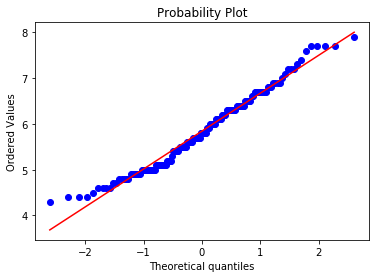

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
fig = plt.figure()

res = stats.probplot(iris_df.sepal_length, plot=plt)

# seabornを使って、例えば欠損値率をバーグラフに表したりできる。Seriesを入力するが、sns.barplot(Seriesのindex, Series)　で表示できる。

In [18]:
import seaborn as sns
#color = sns.color_palette()
#sns.set_style('darkgrid')

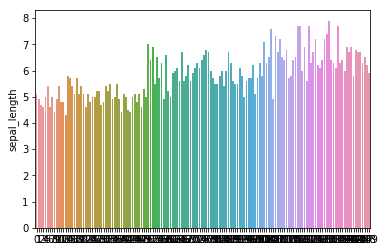

In [19]:
sns.barplot(x=iris_df.sepal_length.index, y=iris_df.sepal_length)

# Correlation mapの計算と、map表示の仕方

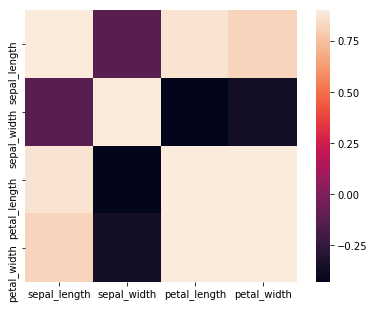

In [20]:
# iris_df.corr()とやったら自動的にnumerical　valueのみ抽出して表示してくれる
corrmat = iris_df.corr()
plt.subplots(figsize=(7,5))
sns.heatmap(corrmat, vmax=0.9, square=True)

# groupbyとtransformを組み合わせて、グループごとの平均とかを欠損値の埋め合わせにしたい時

In [21]:
df = pd.DataFrame({
    'city': ['osaka', 'osaka', 'osaka', 'osaka', 'tokyo', 'tokyo', 'tokyo'],
    'food': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]
})
df

,city,food,price,quantity
0,osaka,apple,100,1
1,osaka,orange,200,2
2,osaka,banana,250,3
3,osaka,banana,300,4
4,tokyo,apple,150,5
5,tokyo,apple,200,6
6,tokyo,banana,400,7


In [22]:
df.groupby(['city']).transform(lambda x: (x/x.sum()*100).astype(str)+'%')

,price,quantity
0,11.76470588235294%,10.0%
1,23.52941176470588%,20.0%
2,29.411764705882355%,30.0%
3,35.294117647058826%,40.0%
4,20.0%,27.77777777777778%
5,26.666666666666668%,33.33333333333333%
6,53.333333333333336%,38.88888888888889%


In [23]:
df[df['city']=='osaka']

,city,food,price,quantity
0,osaka,apple,100,1
1,osaka,orange,200,2
2,osaka,banana,250,3
3,osaka,banana,300,4


## KFold　使い方

In [24]:
df_kfold = df.price
df_kfold

0    100
1    200
2    250
3    300
4    150
5    200
6    400
Name: price, dtype: int64

In [25]:
# それぞれ学習用データと検証用データのインデックスをnd.arrayで取り出せる。

from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
for train, test in kf.split(df_kfold):
    print(train, test)

[3 4 5 6] [0 1 2]
[0 1 2 5 6] [3 4]
[0 1 2 3 4] [5 6]


## concatの使い方

In [26]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])


In [27]:
# これは縦につなげる方法
# 3つとか並べても大丈夫
pd.concat([df1, df2])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [28]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [29]:
# これは横につなげる方法
pd.concat([df1, df4], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


# mergeの使い方

In [34]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'E': ['E0', 'E1', 'E2', 'E3']})

right = pd.DataFrame({'key': ['K1', 'K3', 'K5', 'K7'],
                      'C': ['C1', 'C3', 'C5', 'C7'],
                      'D': ['D1', 'D3', 'D5', 'D7'],
                      'E2': ['E0', 'E3', 'E5', 'E7']},
                     index=[1, 3, 5, 7])

In [35]:
left

,key,A,B,E
0,K0,A0,B0,E0
1,K1,A1,B1,E1
2,K2,A2,B2,E2
3,K3,A3,B3,E3


In [36]:
right

,key,C,D,E2
1,K1,C1,D1,E0
3,K3,C3,D3,E3
5,K5,C5,D5,E5
7,K7,C7,D7,E7


In [37]:
pd.merge(left, right, on='key')

,key,A,B,E,C,D,E2
0,K1,A1,B1,E1,C1,D1,E0
1,K3,A3,B3,E3,C3,D3,E3


In [39]:
pd.merge(left, right, how='left', left_on=['key', 'E'], right_on=['key', 'E2'])

,key,A,B,E,C,D,E2
0,K0,A0,B0,E0,NaN,NaN,NaN
1,K1,A1,B1,E1,NaN,NaN,NaN
2,K2,A2,B2,E2,NaN,NaN,NaN
3,K3,A3,B3,E3,C3,D3,E3


In [65]:
pd.merge(left, right, on='key', how='outer')

,key,A,B,E,C,D,E2
0,K0,A0,B0,E0,NaN,NaN,NaN
1,K1,A1,B1,E1,C1,D1,E0
2,K2,A2,B2,E2,NaN,NaN,NaN
3,K3,A3,B3,E3,C3,D3,E3
4,K5,NaN,NaN,NaN,C5,D5,E5
5,K7,NaN,NaN,NaN,C7,D7,E7


## nd.arrayのいろいろな合体方法

In [30]:
import numpy as np
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.array([[1, 2], [3, 4]])
d = np.array([[5, 6], [7, 8]])

In [31]:
np.vstack((a, b))

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
np.hstack((a, b))

array([1, 2, 3, 4, 5, 6])

In [33]:
np.column_stack((a, b))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [34]:
np.column_stack((c, d))

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

## PCA()　次元削減

In [35]:
import pandas as pd
for_index = [1,2,3,4,5,6]
df = pd.DataFrame(np.random.randn(6,4),index = for_index, columns = list("ABCD"))
df

,A,B,C,D
1,0.684016,0.009496,-0.344300,0.877663
2,-0.501717,-0.457015,-0.055034,-0.651559
3,-1.607382,-0.913355,-0.320477,0.024331
4,-1.128013,-0.924837,1.514968,-0.819662
5,-1.480468,0.265492,-0.249735,0.914956
6,-0.970255,0.669482,0.841907,-1.144050


In [36]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.52173176, 0.77812967, 0.93042865, 1.        ])

In [37]:
# dは95%以上の次元を指定する。95%をちょうど超えたindexは0から数えているため、それに1を足す。
d = np.argmax(cumsum >= 0.95)+1
d

4

## kaggle　便利なコマンド

In [41]:
import numpy as np
kei1 = np.array([1,2])
kei2 = np.array([3,4])

In [42]:
np.r_[kei1, kei2]

array([1, 2, 3, 4])

In [43]:
np.c_[kei1, kei2]

array([[1, 3],
       [2, 4]])

In [44]:
a = np.zeros((0,2))
a

array([], shape=(0, 2), dtype=float64)

In [45]:
np.r_[a, kei1.reshape(1,-1)].astype(int)

array([[1, 2]])

# any, all　の使い方

In [46]:
import numpy as np
a = np.array([
    [1,1,1],
    [1,0,0],
    [1,0,1]
])

In [47]:
b = np.ones((3,3))

In [48]:
np.all(a)

False

In [49]:
np.all(b)

True

In [50]:
np.all(a<2)

True

In [51]:
np.all(a,axis=0)

array([ True, False, False])

In [52]:
a = np.array([
    [3,8,9],
    [2,3,4]
])

In [53]:
np.any(a==8)

True

In [54]:
np.any(a%2==0, axis=1, keepdims=True) #keepdimsは出力次元もそのままにする

array([[ True],
       [ True]])

# np.insert, vstack, hstackの使い方

In [55]:
a = np.arange(100,112).reshape(3,4)
a

array([[100, 101, 102, 103],
       [104, 105, 106, 107],
       [108, 109, 110, 111]])

In [56]:
b = np.arange(1,13).reshape(3,4)
b

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [57]:
np.insert(a, 2, b, axis=0)

array([[100, 101, 102, 103],
       [104, 105, 106, 107],
       [  1,   2,   3,   4],
       [  5,   6,   7,   8],
       [  9,  10,  11,  12],
       [108, 109, 110, 111]])

In [58]:
np.vstack((a,b))

array([[100, 101, 102, 103],
       [104, 105, 106, 107],
       [108, 109, 110, 111],
       [  1,   2,   3,   4],
       [  5,   6,   7,   8],
       [  9,  10,  11,  12]])

In [59]:
np.hstack((a,b))

array([[100, 101, 102, 103,   1,   2,   3,   4],
       [104, 105, 106, 107,   5,   6,   7,   8],
       [108, 109, 110, 111,   9,  10,  11,  12]])

# renameの使い方

In [1]:
# NaNを探してテーブルにする関数
def missing_values_table(df): 
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns 

In [8]:
print(iris_df.shape)
iris_df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
missing_values_table(iris_df)

,Missing Values,% of Total Values
sepal_length,0,0.0
sepal_width,0,0.0
petal_length,0,0.0
petal_width,0,0.0
species,0,0.0


# sortの仕方

In [18]:
iris_df.sepal_length.sort_values(ascending=False).head()

131    7.9
135    7.7
117    7.7
118    7.7
122    7.7
Name: sepal_length, dtype: float64

# 写真の挿入の仕方

![](http://goinjapanesque.com/wpos/wp-content/uploads/2015/07/Japan-map-en.png)

# 正規表現

In [66]:
import re
pattern = r"ca"
text = "caabsacasca"
matchOB = re.match(pattern , text)
if matchOB:
    print(matchOB.group())

ca


In [68]:
pattern = r"ca"
text = "caabsacasca"
matchOB = re.search(pattern , text)

if matchOB:
    print(matchOB)
    print(matchOB.group()) # マッチした文字列を返す # ca
    print(matchOB.start()) # マッチの開始位置を返す # 0
    print(matchOB.end())  # マッチの終了位置を返す # 2
    print(matchOB.span())  # マッチの位置(start, end)を含むタプルを返す # (0, 2)

<_sre.SRE_Match object; span=(0, 2), match='ca'>
ca
0
2
(0, 2)
